# Image Classification

# 1. Importing Dependencies
# 2. Initializing the convolution base using pretrianed model vgg16

# 3. creating model and adding conv base into it 
# 4. freez model

# 5.data augmentation training, validation generator
# 6. compling
# history fiting mode


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras.applications import VGG16
from keras import models
from keras import layers
import numpy
import os 

C:\python3.9.7\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:

conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape = (150,150,3))
 

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
conv_base.trainable = False

In [5]:
base_dir = "formal_and_informal_img/"
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'validation')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [7]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=2e-5),
    metrics=['acc'])

history = model.fit(
    train_generator,
steps_per_epoch=50,
epochs=30,
validation_data=validation_generator,
validation_steps=10)

Epoch 1/30


50/50 [==============================] - 53s 1s/step - loss: 0.6530 - acc: 0.6250 - val_loss: 0.6301 - val_acc: 0.6450
Epoch 2/30
50/50 [==============================] - 73s 1s/step - loss: 0.6039 - acc: 0.6960 - val_loss: 0.6060 - val_acc: 0.6500
Epoch 3/30
50/50 [==============================] - 86s 2s/step - loss: 0.5904 - acc: 0.6760 - val_loss: 0.6064 - val_acc: 0.6550
Epoch 4/30
50/50 [==============================] - 90s 2s/step - loss: 0.5726 - acc: 0.7040 - val_loss: 0.6067 - val_acc: 0.6600
Epoch 5/30
50/50 [==============================] - 73s 1s/step - loss: 0.5649 - acc: 0.7050 - val_loss: 0.5849 - val_acc: 0.6850
Epoch 6/30
50/50 [==============================] - 67s 1s/step - loss: 0.5524 - acc: 0.7240 - val_loss: 0.5770 - val_acc: 0.7150
Epoch 7/30
50/50 [==============================] - 64s 1s/step - loss: 0.5394 - acc: 0.7200 - val_loss: 0.5631 - val_acc: 0.7400
Epoch 8/30
50/50 [==============================] - 57s 1s/step - loss: 0.5273 - acc: 0.

In [8]:
model.save('vgg16.h5')

C:\python3.9.7\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


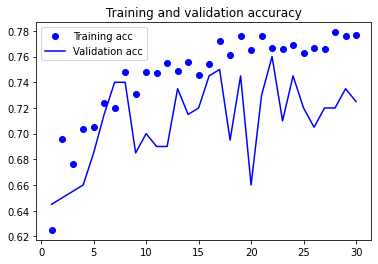

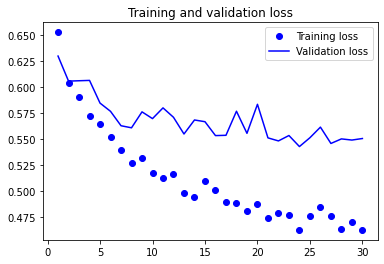

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

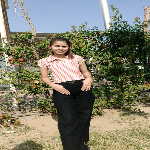

In [37]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
import numpy as np

img_path = 'D:Camera/6th_semester/IMG20221127113823.jpg'
your_target_size=(150,150,3)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(your_target_size))
img

In [38]:
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)


# features = conv_base.predict(img_array)

# Flatten the features 2))

model = load_model('vgg16.h5')
# Make predictions using the trained model
predictions = model.predict(img_array)

# Interpret the results (assuming binary classification)
class_label = "Formal" if predictions[0][0] < 0.5 else "Informal"
confidence = predictions[0][0]

print(f"Predicted class: {class_label}")
print(f"Confidence: {confidence}") 

1/1 [==============================] - 0s 207ms/step
Predicted class: Formal
Confidence: 3.0160825190250762e-05


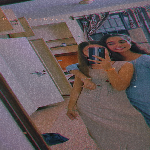

In [39]:

img_path = 'D:Camera/5th_Semester_Photos/Snapchat/Snapchat-1049593915.jpg'
your_target_size=(150,150,3)

# Load and preprocess the image
img = image.load_img(img_path, target_size=(your_target_size))
img

In [41]:
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)


# features = conv_base.predict(img_array)

# Flatten the features 2))

model = load_model('vgg16.h5')
# Make predictions using the trained model
predictions = model.predict(img_array)

# Interpret the results (assuming binary classification)
class_label = "Formal" if predictions[0][0] < 0.5 else "Informal"
confidence = predictions[0][0]

print(f"Predicted class: {class_label}")
print(f"Confidence: {confidence}") 

1/1 [==============================] - 0s 262ms/step
Predicted class: Informal
Confidence: 0.9297152757644653
